# data download

In [ ]:
import os
import zipfile
import shutil

ROOT_FOLDER = '/content'
DATA_FILE = 'cats_and_dogs_filtered.zip'
ZIP_FILE_PATH = os.path.join(ROOT_FOLDER, DATA_FILE)
DATA_ROOT_FOLDER = os.path.join(ROOT_FOLDER, os.path.splitext(DATA_FILE)[0])
TRAIN_FOLDER = os.path.join(DATA_ROOT_FOLDER, 'train')
VALIDATION_FOLDER = os.path.join(DATA_ROOT_FOLDER, 'validation')

# file 삭제
if os.path.exists(ZIP_FILE_PATH):
  os.remove(ZIP_FILE_PATH)
  print(f'{ZIP_FILE_PATH} is removed')

# data download
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

# folder check
if os.path.exists(DATA_ROOT_FOLDER):
  shutil.rmtree(DATA_ROOT_FOLDER)
  print(f'{DATA_ROOT_FOLDER} is removed')

# 압축 풀기
with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as target_file:
  target_file.extractall(ROOT_FOLDER)

# train data 수
train_cats_list = os.listdir(os.path.join(TRAIN_FOLDER, 'cats'))
train_dogs_list = os.listdir(os.path.join(TRAIN_FOLDER, 'dogs'))

# validation data 수
validation_cats_list = os.listdir(os.path.join(VALIDATION_FOLDER, 'cats'))
validation_dogs_list = os.listdir(os.path.join(VALIDATION_FOLDER, 'dogs'))

print(f'train cats = {len(train_cats_list)}, train dogs = {len(train_dogs_list)}')
print(f'validation cats = {len(validation_dogs_list)}, validation dogs = {len(validation_dogs_list)}')

/content/cats_and_dogs_filtered.zip is removed
--2024-10-30 08:18:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  20.2MB/s    in 3.9s    

2024-10-30 08:18:07 (16.7 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

/content/cats_and_dogs_filtered is removed
train cats = 1000, train dogs = 1000
validation cats = 500, validation dogs = 500


# data 준비

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, DataLoader, random_split

BATCH_SIZE = 32
LEARNING_RATE = 1e-6
EPOCHS=20

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"using PyTorch version: {torch.__version__}, device: {device}")

# transforms.Compose(): 복수의 image를 한번에 변경
train_transform = transforms.Compose([
		                  transforms.Resize(size=(224,224)), # 크기를 (224, 224)로 변경
		                  # 학습 효과의 다양성을 위하여, 좌우 반전 효과 , 확률(p) - default 0.5
		                  transforms.RandomHorizontalFlip(),
		                  # [0, 255] 범위 내의 PIL Image나 NumPy ndarray를 torch.FloatTensor로 로 변환
		                  # (HxWxC) ⇒ (CxHxW)로 변경
		                  # image pixel 값을 [0.0, 1.0] 범위로 비례하여 조정(scale)
		                  transforms.ToTensor()])
# 검증과 테스트 data에는 랜덤 효과를 주지 않고 그대로 하도록 설정
validation_transform = transforms.Compose([
				                  transforms.Resize(size=(224,224)),
				                  transforms.ToTensor()])

# dataset 생성
# datasets.ImageFolder(): image가 각 class별로 folder에 나누어져 있을 경우,
#                         이를 dataset 형태로 쉽게 불러 올 수 있다.
train_dataset = datasets.ImageFolder(
                      root=TRAIN_FOLDER,
                      transform=train_transform)
validation_dataset = datasets.ImageFolder(
                      root=VALIDATION_FOLDER,
                      transform=validation_transform)
test_dataset = datasets.ImageFolder(
                      root=VALIDATION_FOLDER,
                      transform=validation_transform)
print(f'type(train_dataset) = {type(train_dataset)}, len(train_dataset) = {len(train_dataset)}')
print(f'type(validation_dataset ) = {type(validation_dataset )}, len(validation_dataset ) = {len(validation_dataset )}')
print(f'type(test_dataset) = {type(test_dataset)}, len(test_dataset) = {len(test_dataset)}')
print(f'train_dataset.classes = {train_dataset.classes}')           # class name
print(f'train_dataset.class_to_idx = {train_dataset.class_to_idx}') # class index
print(train_dataset)
print(validation_dataset)
print(test_dataset)

# DataLoader 생성
train_dataset_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validation_dataset_loader = DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_dataset_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
print(f'len(train_dataset_loader): {len(train_dataset_loader)}')
print(f'len(validation_dataset_loader): {len(validation_dataset_loader)}')
print(f'len(test_dataset_loader): {len(test_dataset_loader)}')

using PyTorch version: 2.5.0+cu121, device: cuda
type(train_dataset) = <class 'torchvision.datasets.folder.ImageFolder'>, len(train_dataset) = 2000
type(validation_dataset ) = <class 'torchvision.datasets.folder.ImageFolder'>, len(validation_dataset ) = 1000
type(test_dataset) = <class 'torchvision.datasets.folder.ImageFolder'>, len(test_dataset) = 1000
train_dataset.classes = ['cats', 'dogs']
train_dataset.class_to_idx = {'cats': 0, 'dogs': 1}
Dataset ImageFolder
    Number of datapoints: 2000
    Root location: /content/cats_and_dogs_filtered/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 1000
    Root location: /content/cats_and_dogs_filtered/validation
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_siz

# data 확인

len(images) = 32, len(labels) = 32
images[0].shape = torch.Size([3, 224, 224])
labels[0] = 1, labels[0].type() = torch.LongTensor
labels_map = {0: 'cats', 1: 'dogs'}


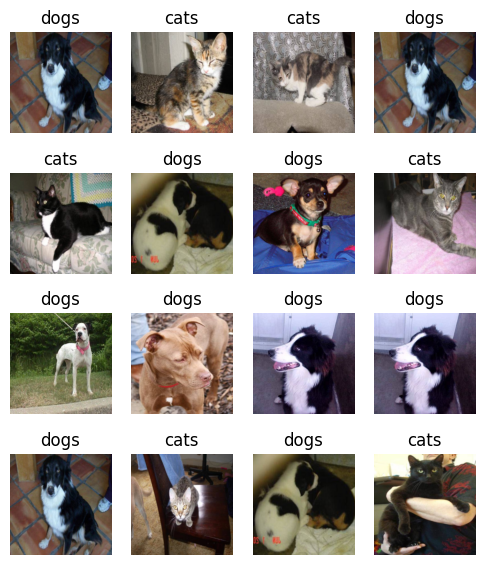

In [ ]:
import matplotlib.pyplot as plt

# iter(): 반복 가능한 객체에서 iterator를 반환
# next(): itreator에서 값을 꺼낸다.
# 1개의 batch를 꺼낸다.
images, labels = next(iter(train_dataset_loader))
print(f'len(images) = {len(images)}, len(labels) = {len(labels)}')
print(f'images[0].shape = {images[0].shape}')
print(f'labels[0] = {labels[0]}, labels[0].type() = {labels[0].type()}')

# class_to_idx의 {key: value}를 {value: key}로 만든다.
labels_map = { v:k for k, v in train_dataset.class_to_idx.items()}
print(f'labels_map = {labels_map}')

figure = plt.figure(figsize=(6, 7))
cols, rows = 4, 4
for i in range(1, cols*rows+1):
  # 0 ~ len(images), 사이의 정수 1개
  sample_idx = torch.randint(len(images), size=(1,)).item()
  img, label = images[sample_idx], labels[sample_idx]

  figure.add_subplot(rows, cols, i)

  plt.title(labels_map[label.item()])
  plt.axis('off')

  # CxHxW => HxWxC
  plt.imshow(torch.permute(img, (1, 2, 0)))

plt.show()

# pre-trained model download

In [ ]:
# model download
# vit_b_16 - 사전 학습 모델
# https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16
# ViT_B_16_Weights.DEFAULT - 사전학습된 가중치, ViT_B_16_Weights.IMAGENET1K_V1 과 동일
pretrained_model = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)
print(pretrained_model)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

# model 정의

In [ ]:
class CatDogTransferLearning(nn.Module):
  def __init__(self, pretrained_model, feature_extractor):
    super().__init__()

    # param.requires_grad: 해당 파라미터에 대한 미분 값을 계산할지 여부
    #    feature extraction시에는 pre-trained model의 parameter update가 되지 않아야 하므로 false
    #    fine tuning시에는 model 전체의 weight를 재학습 하는 것이므로 requires_grad를 True로 설정
    #    이렇게 함으로써 fine-tuning을 위해 feature extraction과 fine-tuning 단계를 분리하고,
    #    학습이 필요한 파라미터만 업데이트할 수 있습니다.
    if (feature_extractor):
      for param in pretrained_model.parameters():
        param.requires_grad = False

    # 학습 data에 맞게 새로운 classifier를 만든 후에,
    # 사전 학습 모델(Pre-Trained Model)의 classifier 부분을
    # 새로 만든 classifier로 변경
    pretrained_model.heads = nn.Sequential(
        # pre-trained model의 heads라는 classifier의 in_features = 768
        nn.Linear(pretrained_model.heads[0].in_features, 128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 2) # label이 {’cat’, ‘dog’} 2개
    )

    self.model = pretrained_model

  def forward(self, data):
    return self.model(data)

feature_extractor = False   # True: Feature Extractor,  False: Fine Tuning
model = CatDogTransferLearning(pretrained_model, feature_extractor).to(device)

# 전이 학습(Transder Learning)의 Fine Tuning에서는
# 사전 학습 모델에서 사용된 가중치를 학습 data에 맞게 미세하게 조정해야 하므로
# 학습률(learning rate)을 lr=1e-6 으로 아주 적게 설정
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

print(model)

CatDogTransferLearning(
  (model): VisionTransformer(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          

# model 학습 함수 정의

In [ ]:
def model_train(dataloader, model, cretirion, optimizer):

  # model을 학습 mode로 ...
  # model parameters((Weight, Bias)를 update하는 mode
  model.train()

  train_loss_sum = train_correct = train_total = 0
  train_total_batch = 0

  '''
  ### Debug ####################################
  index = 0
  ### Debug ####################################
  '''

  # images: 입력 image, labels: 0~9 정답 숫자
  for images, labels in dataloader:

    x_train = images.to(device)
    y_train = labels.to(device)

    outputs = model(x_train) # model에 대한 예측값 계산
    loss = criterion(outputs, y_train) # 손실함수 계산

    # 역전파(backpropagation)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_sum += loss.item()

    '''
    ### Debug ####################################
    if index > 0:
      break
    index += 1

    # 32: batch size
    print(f'images.shape = {images.shape}')    # images.shape = torch.Size([32, 3, 224, 224])
    print(f'labels.shape = {labels.shape}')    # labels.shape = torch.Size([32])
    print(f'x_train.shape = {x_train.shape}')  # x_train.shape = torch.Size([32, 3, 224, 224])
    print(f'y_train.shape = {y_train.shape}')  # y_train.shape = torch.Size([32])
    print(f'y_train.type() = {y_train.type()}')  # y_train.type() = torch.LongTensor
    print(f'y_train.size() = {y_train.size()}')  # y_train.size() = torch.Size([32])
    print(f'y_train.size(0) = {y_train.size(0)}')  # y_train.size(0) = 32
    print(f'outputs.shape = {outputs.shape}')  # outputs.shape = torch.Size([32, 2])
    print(f'y_train = {y_train}')              # y_train = tensor([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])
    print(f'outputs[0] = {outputs[0]}')        # outputs[0] = tensor([-0.3136,  0.4477], grad_fn=<SelectBackward0>)
    print(f'torch.argmax(outputs, 1) = {torch.argmax(outputs, 1)}') # 0.4477 의 index 1 return
                                               # torch.argmax(outputs, 1) = tensor([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])
    print(f'outputs = {outputs}')
    ### Debug ####################################
    '''

    train_total += y_train.size(0) # 64, size(): shape과 동일
    # argmax(tensor, dim=1): dim(열)을 기준(각 행에서)으로 안에 있는 최대값의 위치를 각각 반환
    # item(): tensor에 저장된 값만을 반환
    train_correct += (torch.argmax(outputs, 1) == y_train).sum().item()

  # 학습 data의 평균 오차 계산
  train_avg_loss = train_loss_sum / len(dataloader)
  # 학습 data의 평균 정확도 계산
  train_avg_accuracy = 100 * train_correct / train_total

  return (train_avg_loss, train_avg_accuracy)
'''
### Debug ####################################
model_train(train_dataset_loader, model, criterion, optimizer)
### Debug ####################################
'''

'\n### Debug ####################################\nmodel_train(train_dataset_loader, model, criterion, optimizer)\n### Debug ####################################\n'

# model 검증 함수 정의

In [ ]:
def model_evaluate(dataloader, model, loss_function, optimizer):

  # model을 평가(추론) mode로 ..
  # model의 parameter를 update 하지 않는 mode
  model.eval()

  # gradient를 계산하는 autograd engine을 비활성화한다.
  # 역전파(Backpropagation)에 필요한 메모리 등을 절약할 수 있어 계산 시 연산 속도가 빨라진다
  with torch.no_grad():
    # 검증 함수에는 역전파(Backpropagation) code가 없다.
    # 이 함수의 목적은 parameter를 학습을 하는 것이 아니라
    # 현재 model의 오차와 정확도를 알아내는 것이다.

    eval_loss_sum = eval_correct = eval_total = 0

    total_eval_batch = len(dataloader)

    for images, labels in dataloader:
      # images.shape = (batch_size, 1, 28, 28)
      x_eval = images.to(device)
      y_eval = labels.to(device)

      outputs = model(x_eval)
      loss = criterion(outputs, y_eval)

      # 역전파(backpropagation) code가 없다.

      eval_loss_sum += loss.item()

      eval_total += y_eval.size(0)
      eval_correct += (torch.argmax(outputs, 1) == y_eval).sum().item()

    # 검증 data의 평균 오차 계산
    eval_avg_loss = eval_loss_sum / total_eval_batch
    # 검증 data의 평균 정확도 계산
    eval_avg_accuracy = 100 * eval_correct / eval_total

    return (eval_avg_loss, eval_avg_accuracy)

# 학습

In [ ]:
from datetime import datetime

train_loss_list = []
train_accuracy_list = []

eval_loss_list = []
eval_accuracy_list = []

start_time = datetime.now()

for epoch in range(EPOCHS):
  # model train
  train_avg_loss, train_avg_accuracy = model_train(
                  train_dataset_loader,
                  model,
                  criterion,
                  optimizer)
  train_loss_list.append(train_avg_loss)
  train_accuracy_list.append(train_avg_accuracy)

  # model evaluation
  eval_avg_loss, eval_avg_accuracy = model_evaluate(
                  validation_dataset_loader,
                  model,
                  criterion,
                  optimizer)
  eval_loss_list.append(eval_avg_loss)
  eval_accuracy_list.append(eval_avg_accuracy)

  print(f'epoch={epoch+1:02d}, train_loss={train_avg_loss}, train_accuracy={train_avg_accuracy}, eval_loss={eval_avg_loss}, eval_accuracy={eval_avg_accuracy}')

end_time = datetime.now()
print('elapsed time => ', end_time-start_time)

epoch=01, train_loss=0.6690806765404959, train_accuracy=58.35, eval_loss=0.6273344401270151, eval_accuracy=72.0
epoch=02, train_loss=0.5851224471652319, train_accuracy=77.55, eval_loss=0.5323468167334795, eval_accuracy=90.0
epoch=03, train_loss=0.47907253863319516, train_accuracy=89.9, eval_loss=0.41830678656697273, eval_accuracy=97.5
epoch=04, train_loss=0.36227154826361035, train_accuracy=95.6, eval_loss=0.3000344429165125, eval_accuracy=98.7
epoch=05, train_loss=0.2636200549110534, train_accuracy=97.6, eval_loss=0.20897840010002255, eval_accuracy=98.8
epoch=06, train_loss=0.1884848347731999, train_accuracy=98.7, eval_loss=0.14900994882918894, eval_accuracy=99.2
epoch=07, train_loss=0.13598829779833083, train_accuracy=99.3, eval_loss=0.11033914401195943, eval_accuracy=99.1
epoch=08, train_loss=0.10557403084304598, train_accuracy=99.2, eval_loss=0.08568224310874939, eval_accuracy=99.3
epoch=09, train_loss=0.07761059725095355, train_accuracy=99.8, eval_loss=0.07086060766596347, eval_ac

# 시각화

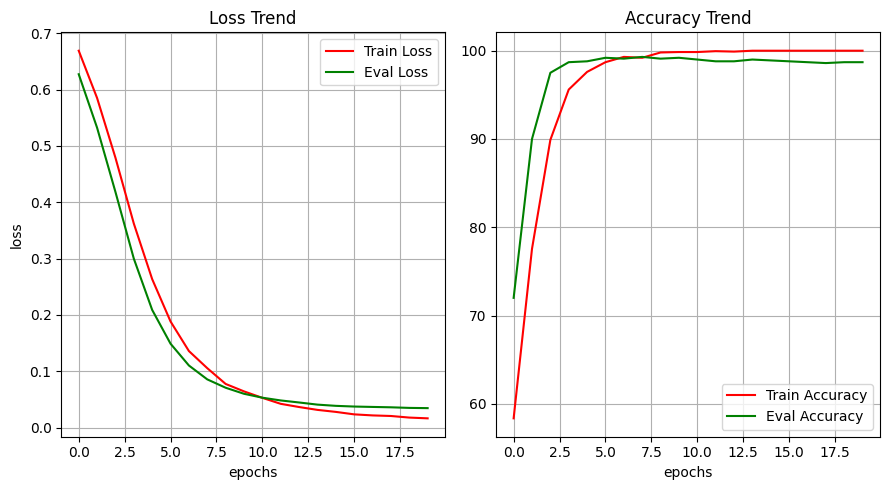

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

####################################################
plt.subplot(1, 2, 1)                # nrows=1, ncols=2, index=1
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(train_loss_list, color='red', label='Train Loss')
plt.plot(eval_loss_list, color='green', label='Eval Loss')
plt.legend(loc='best')

####################################################
plt.subplot(1, 2, 2)                # nrows=1, ncols=2, index=2
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.grid()
plt.plot(train_accuracy_list, color='red', label='Train Accuracy')
plt.plot(eval_accuracy_list, color='green', label='Eval Accuracy')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# 평가

In [ ]:
# model_evaluate() 와 동일한 code
def model_test(dataloader, model, loss_function, optimizer):

  # model을 평가(추론) mode로 ..
  # model의 parameter를 update 하지 않는 mode
  model.eval()

  # gradient를 계산하는 autograd engine을 비활성화한다.
  # 역전파(Backpropagation)에 필요한 메모리 등을 절약할 수 있어 계산 시 연산 속도가 빨라진다
  with torch.no_grad():
    # 검증 함수에는 역전파(Backpropagation) code가 없다.
    # 이 함수의 목적은 parameter를 학습을 하는 것이 아니라
    # 현재 model의 오차와 정확도를 알아내는 것이다.

    test_loss_sum = test_correct = test_total = 0

    total_test_batch = len(dataloader)

    for images, labels in dataloader:
      # images.shape = (batch_size, 1, 28, 28)
      x_test = images.to(device)
      y_test = labels.to(device)

      outputs = model(x_test)
      loss = criterion(outputs, y_test)

      test_loss_sum += loss.item()

      test_total += y_test.size(0)
      test_correct += (torch.argmax(outputs, 1) == y_test).sum().item()

    test_avg_loss = test_loss_sum / total_test_batch
    test_avg_accuracy = 100 * test_correct / test_total

    return (test_avg_loss, test_avg_accuracy)

test_loss, test_accuracy = model_test(
                  test_dataset_loader,
                  model,
                  criterion,
                  optimizer)
print(f'test_loss={test_loss}, test_accuracy={test_accuracy}')
# test_loss=0.0346631757565774, test_accuracy=98.7

test_loss=0.0346631757565774, test_accuracy=98.7
